# Log2FC heatmap generation with Iterative Group Analysis (iGA) integrated

### The following script can be used to generate heatmaps and perform iGA on transcriptomics data sets and regulon files
### Both Python and R must be installed to do this - it is noted in the script when R should be used 

Import Python libraries and set working directory

In [1]:
import pandas as pd
import numpy as np
import os
from plotnine import *
os.chdir('C:\\Users\\Owner\\Script2_iGA')

Import rpy2 package to allow R to be run from within Python when performing iGA - N.B. Rmpfr is an R package required for iGA

In [2]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
base = importr('base')
utils = importr('utils')
Rmpfr = importr('Rmpfr')

In [3]:
import rpy2.robjects.packages as rpackages
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

rpy2.rinterface.NULL

Load csv files with pandas.read_csv function 

Input files required: Two transcriptomics data sets and at least 1 regulon file

In [4]:
M1146= pd.read_csv("TPM_M1146-ACT Data.csv", index_col= 'Locus_tag')
M1146_ACT= pd.read_csv("TPM_M1146+ACT Data.csv", index_col= 'Locus_tag')
dfsoxr = pd.read_csv("SoxR regulon.csv")
dfglnr = pd.read_csv("GlnR regulon.csv")
dfpho = pd.read_csv("Pho regulon.csv")

Replace zeros in both transcriptomics data sets with the minimum value found across half of the entire dataset - This must be done as iGA functions are not compatible with zero values
df_ratios calculates the ratio of the two datasets and df_log2_FC calculates the log2 fold change of the ratio

In [5]:
df = M1146.copy()
M1146=M1146.replace(0, float('NaN'))
M1146=M1146.replace(float('NaN'),np.min(M1146.min(axis=1))/2)
df1 = M1146_ACT.copy()
M1146_ACT=M1146_ACT.replace(0, float('NaN'))
M1146_ACT=M1146_ACT.replace(float('NaN'),np.min(M1146_ACT.min(axis=1))/2)

In [6]:
df_ratios = M1146_ACT/M1146

In [7]:
df_ratios

,18h,20h,22h,26h,30h,32h,34h,38h,44h,50h
Locus_tag,,,,,,,,,,
SCO3998,0.914317,0.475293,0.665108,0.753329,0.841881,1.077995,1.063045,1.078273,0.931359,1.550034
SCO3999,0.972016,1.370905,1.069973,1.109760,1.127758,0.832917,0.836905,0.907585,0.586653,1.039672
SCO4000,0.655843,2.816036,1.348563,1.059883,2.120970,1.077075,1.074852,0.442724,1.221620,0.718100
SCO4001,0.871974,3.148485,2.163320,1.854795,1.749800,2.019515,0.486447,1.296550,0.992566,0.550858
SCO4002,1.609798,0.880011,0.813060,0.968710,1.365325,2.192617,0.947577,0.865638,0.975769,0.546685
...,...,...,...,...,...,...,...,...,...,...
SCO3595,1.197029,1.098681,1.423047,0.983396,1.655216,0.926601,1.212653,0.703174,0.787372,0.663285
SCO2292,0.770501,1.642688,1.829550,1.002592,1.120041,0.963153,0.760074,0.593852,0.523551,0.625975
SCO5056,1.001916,1.140644,1.319210,1.388691,1.366637,1.070519,1.031858,1.022434,0.722193,0.896920


In [8]:
df_log2_FC = df_ratios.apply(np.log2)

In [9]:
df_log2_FC

,18h,20h,22h,26h,30h,32h,34h,38h,44h,50h
Locus_tag,,,,,,,,,,
SCO3998,-0.129233,-1.073111,-0.588340,-0.408647,-0.248312,0.108350,0.088202,0.108722,-0.102591,0.632300
SCO3999,-0.040948,0.455129,0.097575,0.150247,0.173458,-0.263755,-0.256864,-0.139895,-0.769419,0.056128
SCO4000,-0.608577,1.493666,0.431423,0.083905,1.084724,0.107119,0.104138,-1.175519,0.288795,-0.477743
SCO4001,-0.197643,1.654658,1.113247,0.891260,0.807190,1.014009,-1.039645,0.374678,-0.010765,-0.860247
SCO4002,0.686879,-0.184406,-0.298567,-0.045863,0.449244,1.132654,-0.077685,-0.208165,-0.035389,-0.871218
...,...,...,...,...,...,...,...,...,...,...
SCO3595,0.259458,0.135772,0.508984,-0.024155,0.727020,-0.109980,0.278167,-0.508046,-0.344883,-0.592299
SCO2292,-0.376130,0.716058,0.871489,0.003734,0.163552,-0.054162,-0.395789,-0.751825,-0.933597,-0.675822
SCO5056,0.002761,0.189849,0.399674,0.473726,0.450630,0.098310,0.045244,0.032007,-0.469544,-0.156949


The 'df.loc' function locates the locus tags from a regulon file that are in the Log2 fold change matrix so they can be plotted as heatmap below

The 'df.stack()' function  organises the matrix of log2 fold change for the regulon into a format that the ggplot function can use to plot the heat map

In [10]:
soxr_regulon = df_log2_FC.loc[dfsoxr["Locus tag"]]

In [11]:
soxr_regulon

,18h,20h,22h,26h,30h,32h,34h,38h,44h,50h
Locus_tag,,,,,,,,,,
SCO0319,-0.976086,2.348327,1.746465,0.083905,0.495246,1.724503,-0.777218,-0.178369,0.376258,-0.610727
SCO0320,4.959898,7.078002,8.460710,5.498942,5.617405,5.899095,4.365024,3.889852,4.240080,4.665215
SCO0321,3.577319,3.885983,4.526222,2.798150,3.066881,4.050584,2.687627,3.158354,3.342206,3.055135
SCO1178,3.889509,5.045695,5.437598,3.664236,4.292466,4.325076,3.566143,3.586209,3.394180,3.927062
SCO1697,-0.352198,-0.220126,-0.345160,-0.419333,0.105679,-0.046846,0.120335,-0.189648,-0.515654,0.529879
SCO1734,0.442954,0.301021,2.113247,-0.215656,0.357743,0.107119,-0.796326,-0.415530,-0.595728,-0.116395
SCO1909,3.203455,4.357604,5.493739,4.628225,5.009042,4.578213,3.704613,4.079273,3.807448,3.956446
SCO2476,0.686879,2.828268,2.617836,2.260782,1.515009,1.876956,0.942628,0.281568,0.458720,0.239289
SCO2477,2.393148,3.223853,4.586663,2.346939,3.237178,2.916454,1.620422,1.499929,1.520648,1.988575


In [12]:
df1 = soxr_regulon.stack().rename_axis(('Locus_tag', 'Time')).reset_index(name='Value')
df1

,Locus_tag,Time,Value
0,SCO0319,18h,-0.976086
1,SCO0319,20h,2.348327
2,SCO0319,22h,1.746465
3,SCO0319,26h,0.083905
4,SCO0319,30h,0.495246
...,...,...,...
145,SCO7008,32h,2.417906
146,SCO7008,34h,2.443747
147,SCO7008,38h,2.177295
148,SCO7008,44h,2.180812


Heat map inputs:
colors = The colors you wish to use for the heatmap - The number of colors used must be equal to the breaks used (see below)

lims = The limits for the heatmap axis - These are to be the minimum value for your axis and the maximum value 

breaks = The breaks of the colorbar used for the heatmap - These will be your minimum axis value(s), midpoint and maximum axis 
value(s) - as many breaks can be used as required but the number of breaks must be equal to the number of colors used

The x axis input must be the timepoints used in your stacked dataframe created above and the y axis input must be the locus tags

Heatmap elements that can be changed:

x and y axis values must be the time points and locus tags of your stacked dataframe above, respectively

'fill' must be the log2 fold change value from your stacked dataframe

'labels'= the labels used for the heatmap colorbar - these should be the same as the breaks you have input

'ggtitle'= heatmap title

'labs'= x and y axis labels

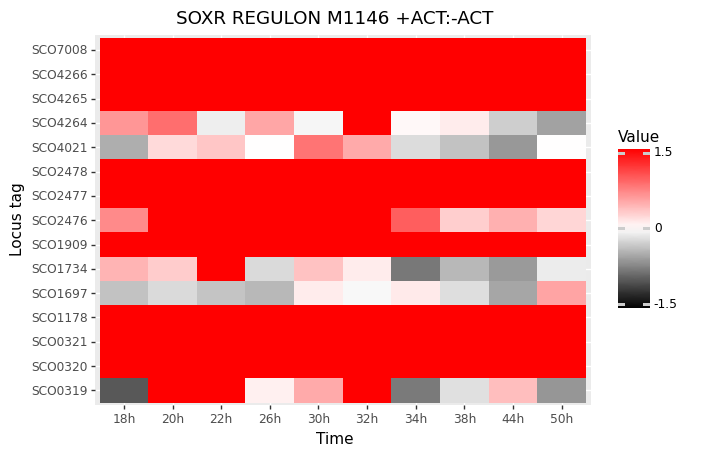

<ggplot: (-9223371894524785328)>

In [13]:
colors = ("black", "white", "red")
lims= (-1.5,1.5)
breaks = (-1.5,0,1.5)
a = ggplot(df1, aes(x='Time', y='Locus_tag')) + geom_tile(aes(fill = 'Value'))+ scale_fill_gradientn(limits= lims,colors= colors, breaks=(-1.5,0,1.5),labels=("-1.5", "0", "1.5"))
b = (a + ggtitle('SOXR REGULON M1146 +ACT:-ACT') + labs(y="Locus tag", x = "Time"))
b

Save the heatmap as a png file - width and height can be specified

In [14]:
b.save('Script2HeatMap1.png', width = 14, height = 14)

C:\Users\Owner\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 14 x 14 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Script2HeatMap1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


# Iterative Group Analysis (iGA) for a regulon containing only activated genes 

'df.loc' locates the columns of the log2 fold change matrix and the letter 'X' is added at the beginning of columns names so that they are recognisable in R 

N.B. R does not recognise numbers in column names

The dataframe is then saved as the csv file 'metric' which is an input for iGA in R

In [15]:
df2 = df_log2_FC.loc[:, df.columns]
df3 = df2.add_prefix('X')
dfregulon = pd.read_csv("SoxR regulon.csv")

df4 = df3.reset_index()
df4['Group'] = df4['Locus_tag'].isin(dfregulon['Locus tag']).astype(int)
df5 = df4[['Group']]
group_membership = df5
group_membership.to_csv("group_membership.csv")


In [16]:
import rpy2.robjects as robjects
iGA_res = pd.DataFrame()
for tp in df3.columns:
    metric = df3.loc[:,tp]
    metric.to_csv("metric.csv")
    r_source = robjects.r['source']
    r_source('iGA_decreasing.R')
    tmp = pd.read_csv("outputiGA_tmp.csv")
    iGA_res[tp]=tmp.loc[0,:]
    
iGA_res = iGA_res.transpose()
iGA_res

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


,minPC,list.position,N.var.selected,N.var.group
X18h,6.204278e-14,108.0,9.0,15.0
X20h,1.766811e-17,127.0,11.0,15.0
X22h,1.246158e-16,56.0,9.0,15.0
X26h,9.052094e-18,74.0,10.0,15.0
X30h,3.395849e-17,49.0,9.0,15.0
X32h,6.681572e-17,217.0,12.0,15.0
X34h,2.842596e-16,61.0,9.0,15.0
X38h,1.046611e-16,55.0,9.0,15.0
X44h,3.438815e-13,130.0,9.0,15.0
X50h,2.774052e-17,48.0,9.0,15.0


The index of df3 is reset so that it becomes a column which can be removed at a later stage

The 'Group' column is a binary representation of locus tags - 'isin' locates locus tags found in both the regulon file and the transcriptomics file and assigns them a 1 in the 'Group' column - locus tags not in the regulon file but in the transcriptomics file are assigned a 0

The 'Group' column becomes another dataframe so that it can be saved as the csv file 'group_membership_regulon_name' which is an input for iGA in R

After this stage, move to R to complete iGA

This stage is to be completed after iGA has been performed in R

ln[18] and ln[19] enable the R script for the iGA to be run in Python - when the R script has finished running, a statement confirming this will be printed

Load csv files containing iGA results for each time point with 'pd.read_csv' function

dfmerge collates the results from each csv into one table

dfmerge.set_index allows you to reset the index so that each time point is visible next to it's corresponding results

# Heatmap generation and Iterative Group Analysis (iGA) for a regulon containing both activated and repressed genes - 2 examples 

## Example 1: glnR regulon

The 'df.loc' function locates the locus tags from a regulon file that are in the Log2 fold change matrix so they can be plotted as heatmap below

The 'df.stack()' function  organises the matrix of log2 fold change for the regulon into a format that the ggplot function can use to plot the heat map

In [17]:
glnr_regulon = df_log2_FC.loc[dfglnr["Locus tag"]]

In [18]:
glnr_regulon

,18h,20h,22h,26h,30h,32h,34h,38h,44h,50h
Locus_tag,,,,,,,,,,
SCO4159,-0.478130,0.168087,0.336958,-0.009800,0.314547,0.610027,0.298356,0.451381,-0.331375,0.711047
SCO2198,-0.439885,-0.135390,-0.240401,-0.073487,0.370143,-0.074753,-0.026630,0.050432,-0.041135,0.259984
SCO5583,-0.954836,-0.250302,0.530349,0.208686,0.836709,0.250243,0.250979,-0.045258,-0.464828,0.026772
SCO5584,-0.368131,-0.238962,0.502355,0.759776,1.464429,0.724503,0.713146,0.217657,-0.147001,0.284021
SCO5585,-0.367269,-0.255269,0.691209,0.537815,0.549105,0.682300,-0.273533,-0.364213,-0.211490,-0.181713
...,...,...,...,...,...,...,...,...,...,...
SCO6148,0.311966,0.025294,-0.166076,-0.135259,0.189139,0.108646,0.306224,0.352583,-0.130747,0.124330
SCO1864,0.171732,-0.089769,0.089976,-0.198229,0.463959,0.126177,0.362846,0.423006,-0.895829,0.314718
SCO1865,0.022300,0.252017,0.587643,-0.111628,0.523851,0.186600,0.424652,0.286113,-0.705399,0.222924


In [19]:
df6 = glnr_regulon.stack().rename_axis(('Locus_tag', 'Time')).reset_index(name='Value')
df6

,Locus_tag,Time,Value
0,SCO4159,18h,-0.478130
1,SCO4159,20h,0.168087
2,SCO4159,22h,0.336958
3,SCO4159,26h,-0.009800
4,SCO4159,30h,0.314547
...,...,...,...
745,SCO1867,32h,0.118827
746,SCO1867,34h,0.269337
747,SCO1867,38h,0.487263
748,SCO1867,44h,-0.487194


Heat map inputs:
colors = The colors you wish to use for the heatmap - The number of colors used must be equal to the breaks used (see below)

lims = The limits for the heatmap axis - These are to be the minimum value for your axis and the maximum value 

breaks = The breaks of the colorbar used for the heatmap - These will be your minimum axis value(s), midpoint and maximum axis 
value(s) - as many breaks can be used as required but the number of breaks must be equal to the number of colors used

The x axis input must be the timepoints used in your stacked dataframe created above and the y axis input must be the locus tags

Heatmap elements that can be changed:

x and y axis values must be the time points and locus tags of your stacked dataframe above, respectively

'fill' must be the log2 fold change value from your stacked dataframe

'labels'= the labels used for the heatmap colorbar - these should be the same as the breaks you have input

'ggtitle'= heatmap title

'labs'= x and y axis labels

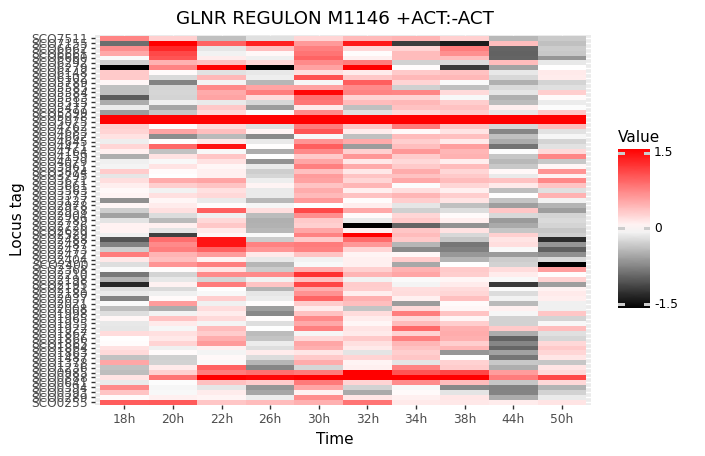

<ggplot: (-9223371894522395384)>

In [20]:
colors = ("black", "white", "red")
lims= (-1.5,1.5)
b = (-1.5,0,1.5)
a = ggplot(df6, aes(x='Time', y='Locus_tag')) + geom_tile(aes(fill = 'Value'))+ scale_fill_gradientn(limits= lims,colors= colors, breaks=(-1.5,0,1.5),labels=("-1.5", "0", "1.5"))
b = (a + ggtitle('GLNR REGULON M1146 +ACT:-ACT') + labs(y="Locus tag", x = "Time"))
b

Save the heatmap as a png file - width and height can be specified

In [21]:
b.save('Script2HeatMap2.png', width = 14, height = 14)

C:\Users\Owner\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 14 x 14 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Script2HeatMap2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


If a regulon file contains both actviated and repressed locus tags, they can be located and presented as a new dataframe using the 'df.loc' function

Below, 'df.loc' is used to locate locus tags where 'Activated' is present in the 'Effect' columns of the regulon file

The locus tag which is the regulon regulator, and so will have 'Regulator' in the 'Effect' column is appended onto the dataframe using the 'df.append' function


In [22]:
df7 = dfglnr.loc[dfglnr['Effect'] == 'Activated', ['Locus tag']]
df8 = df7.append({'Locus tag':'SCO4159'}, ignore_index=True)

The index of df3 is reset and becomes a new dataframe, so that it becomes a column which can be removed at a later stage

The 'Group' column is a binary representation of locus tags - 'isin' locates locus tags found in both the regulon file and the transcriptomics file and assigns them a 1 in the 'Group' column - locus tags not in the regulon file but in the transcriptomics file are assigned a 0

The 'Group' column becomes another dataframe so that it can be saved as the csv file 'group_membership_regulon_name' which is an input for iGA in R

After this stage, move to R to complete iGA

In [23]:
dfregulon = df8
df9 = df3.reset_index()
df9['Group'] = df9['Locus_tag'].isin(dfregulon['Locus tag']).astype(int)
df10 = df9[['Group']]
group_membership = df10
group_membership.to_csv("group_membership.csv")

This stage is to be completed after iGA has been performed in R

ln[29] and ln[30] enable the R script for the iGA to be run in Python - when the R script has finished running, a statement confirming this will be printed

In [24]:
import rpy2.robjects as robjects
iGA_res = pd.DataFrame()
for tp in df3.columns:
    metric = df3.loc[:,tp]
    metric.to_csv("metric.csv")
    r_source = robjects.r['source']
    r_source('iGA_decreasing.R')
    tmp = pd.read_csv("outputiGA_tmp.csv")
    iGA_res[tp]=tmp.loc[0,:]
    
iGA_res = iGA_res.transpose()
iGA_res

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


,minPC,list.position,N.var.selected,N.var.group
X18h,0.002694,17.0,2.0,36.0
X20h,0.002092,15.0,2.0,36.0
X22h,0.000569,8.0,2.0,36.0
X26h,0.001327,12.0,2.0,36.0
X30h,0.001818,14.0,2.0,36.0
X32h,0.000569,8.0,2.0,36.0
X34h,0.000021,2312.0,23.0,36.0
X38h,0.000205,5.0,2.0,36.0
X44h,0.000569,8.0,2.0,36.0
X50h,0.000730,9.0,2.0,36.0


Below, 'df.loc' is used to locate locus tags where 'Repressed' is present in the 'Effect' columns of the regulon file

The locus tag which is the regulon regulator, and so will have 'Regulator' in the 'Effect' column is appended onto the dataframe using the 'df.append' function

In [25]:
df11 = dfglnr.loc[dfglnr['Effect'] == 'Repressed', ['Locus tag']]
df12 = df11.append({'Locus tag':'SCO4159'}, ignore_index=True)

The index of df3 is reset and becomes a new dataframe, so that it becomes a column which can be removed at a later stage

The 'Group' column is a binary representation of locus tags - 'isin' locates locus tags found in both the regulon file and the transcriptomics file and assigns them a 1 in the 'Group' column - locus tags not in the regulon file but in the transcriptomics file are assigned a 0

The 'Group' column becomes another dataframe so that it can be saved as the csv file 'group_membership_regulon_name' which is an input for iGA in R

After this stage, move to R to complete iGA

In [26]:
dfregulon = df12
df13 = df3.reset_index()
df13['Group'] = df13['Locus_tag'].isin(dfregulon['Locus tag']).astype(int)
df14 = df13[['Group']]
group_membership = df14
group_membership.to_csv("group_membership.csv")

This stage is to be completed after iGA has been performed in R

ln[34] and ln[35] enable the R script for the iGA to be run in Python - when the R script has finished running, a statement confirming this will be printed

In [27]:
import rpy2.robjects as robjects
iGA_res = pd.DataFrame()
for tp in df3.columns:
    metric = df3.loc[:,tp]
    metric.to_csv("metric.csv")
    r_source = robjects.r['source']
    r_source('iGA_increasing.R')
    tmp = pd.read_csv("outputiGA_tmp.csv")
    iGA_res[tp]=tmp.loc[0,:]
    
iGA_res = iGA_res.transpose()
iGA_res

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


,minPC,list.position,N.var.selected,N.var.group
X18h,0.185046,7427.0,34.0,34.0
X20h,0.041973,4749.0,26.0,34.0
X22h,0.004574,4677.0,28.0,34.0
X26h,0.000005,3978.0,30.0,34.0
X30h,0.313501,7270.0,33.0,34.0
X32h,0.003067,5151.0,30.0,34.0
X34h,0.782409,7748.0,34.0,34.0
X38h,0.796290,7752.0,34.0,34.0
X44h,0.007078,822.0,9.0,34.0
X50h,0.638731,7702.0,34.0,34.0


## Example 2: pho regulon

In [28]:
pho_regulon = df_log2_FC.loc[dfpho['Locus tag']]

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [29]:
pho_regulon

,18h,20h,22h,26h,30h,32h,34h,38h,44h,50h
Locus_tag,,,,,,,,,,
SCO0033,-0.113812,0.948719,0.858433,-0.051025,-0.353965,-0.655842,-0.642582,-1.210285,-1.028279,-0.322185
SCO0034,0.686879,1.239620,1.305892,1.253830,0.062287,0.499436,-0.653176,-0.139895,-0.156616,-0.722116
SCO0216,4.048774,0.978760,-0.524288,-0.124754,0.323278,0.313058,-0.336749,0.184776,-0.406611,0.466987
SCO0217,3.965415,1.160277,-0.680955,-0.038892,0.577229,0.386465,-0.405182,0.082778,-0.907310,0.166015
SCO0255,0.959898,0.967597,0.335639,0.388759,0.466153,0.811380,0.118785,0.135739,0.111917,0.155601
...,...,...,...,...,...,...,...,...,...,...
SCO6025,0.206886,0.535486,0.305892,0.702814,0.117891,-0.137994,-0.285606,-0.461823,0.062791,-0.886719
SCO6534,-0.451681,0.048634,0.601348,0.467233,-0.442424,0.228681,-0.574932,-0.673874,-0.183728,-0.125855
SCO6535,-0.161118,0.086427,0.828570,0.026189,-0.297146,0.138337,-0.807032,-0.749520,-0.118423,-0.607235


In [30]:
df15 = pho_regulon.stack().rename_axis(('Locus_tag', 'Time')).reset_index(name='Value')
df15

,Locus_tag,Time,Value
0,SCO0033,18h,-0.113812
1,SCO0033,20h,0.948719
2,SCO0033,22h,0.858433
3,SCO0033,26h,-0.051025
4,SCO0033,30h,-0.353965
...,...,...,...
1025,SCO7697,32h,0.724503
1026,SCO7697,34h,0.173577
1027,SCO7697,38h,0.152886
1028,SCO7697,44h,-0.401314


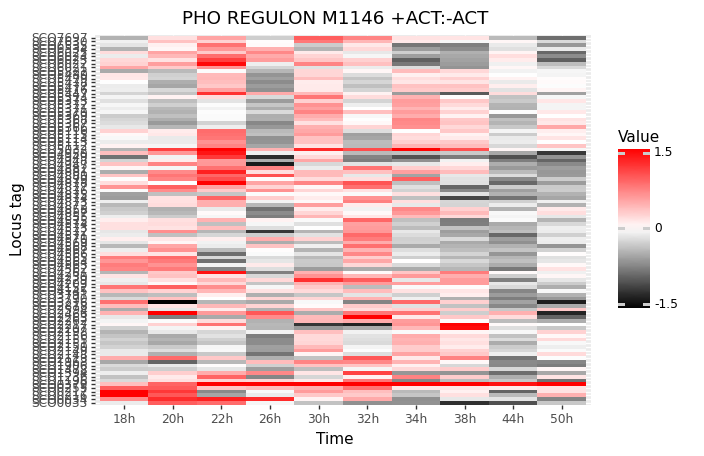

<ggplot: (-9223371894518433020)>

In [31]:
colors = ("black", "white", "red")
lims= (-1.5,1.5)
b = (-1.5,0,1.5)
a = ggplot(df15, aes(x='Time', y='Locus_tag')) + geom_tile(aes(fill = 'Value'))+ scale_fill_gradientn(limits= lims,colors= colors, breaks=(-1.5,0,1.5),labels=("-1.5", "0", "1.5"))
b = (a + ggtitle('PHO REGULON M1146 +ACT:-ACT') + labs(y="Locus tag", x = "Time"))
b

In [32]:
b.save('Script2HeatMap3.png', width = 14, height = 14)

C:\Users\Owner\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 14 x 14 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Script2HeatMap3.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [33]:
df16 = dfpho.loc[dfpho['Effect'] == 'Activated', ['Locus tag']]
df17 = df16.append({'Locus tag':'SCO4230'}, ignore_index=True)

In [34]:
dfregulon = df17
df18 = df3.reset_index()
df18['Group'] = df18['Locus_tag'].isin(dfregulon['Locus tag']).astype(int)
df19 = df18[['Group']]
group_membership = df19
group_membership.to_csv("group_membership.csv")

In [35]:
import rpy2.robjects as robjects
iGA_res = pd.DataFrame()
for tp in df3.columns:
    metric = df3.loc[:,tp]
    metric.to_csv("metric.csv")
    r_source = robjects.r['source']
    r_source('iGA_decreasing.R')
    tmp = pd.read_csv("outputiGA_tmp.csv")
    iGA_res[tp]=tmp.loc[0,:]
    
iGA_res = iGA_res.transpose()
iGA_res

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


,minPC,list.position,N.var.selected,N.var.group
X18h,0.054617,59.0,2.0,50.0
X20h,0.013290,3701.0,32.0,50.0
X22h,0.006439,3245.0,30.0,50.0
X26h,0.206861,1594.0,13.0,50.0
X30h,0.139039,7503.0,50.0,50.0
X32h,0.156470,1373.0,12.0,50.0
X34h,0.020054,163.0,4.0,50.0
X38h,0.040975,298.0,5.0,50.0
X44h,0.218621,7571.0,50.0,50.0
X50h,0.280260,51.0,1.0,50.0


In [36]:
df20 = dfpho.loc[dfpho['Effect'] == 'Repressed', ['Locus tag']]
df21 = df20.append({'Locus tag':'SCO4230'}, ignore_index=True)

In [37]:
dfregulon = df21
df22 = df3.reset_index()
df22['Group'] = df22['Locus_tag'].isin(dfregulon['Locus tag']).astype(int)
df23 = df22[['Group']]
group_membership = df23
group_membership.to_csv("group_membership.csv")

In [38]:
import rpy2.robjects as robjects
iGA_res = pd.DataFrame()
for tp in df3.columns:
    metric = df3.loc[:,tp]
    metric.to_csv("metric.csv")
    r_source = robjects.r['source']
    r_source('iGA_increasing.R')
    tmp = pd.read_csv("outputiGA_tmp.csv")
    iGA_res[tp]=tmp.loc[0,:]
    
iGA_res = iGA_res.transpose()
iGA_res

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


,minPC,list.position,N.var.selected,N.var.group
X18h,6.320923e-03,5440.0,43.0,50.0
X20h,1.951010e-04,1396.0,20.0,50.0
X22h,2.089157e-05,1896.0,26.0,50.0
X26h,1.105319e-14,951.0,29.0,50.0
X30h,4.995916e-05,759.0,15.0,50.0
X32h,4.010372e-05,1963.0,26.0,50.0
X34h,2.982042e-01,7618.0,50.0,50.0
X38h,6.451105e-01,7192.0,46.0,50.0
X44h,6.132111e-04,6136.0,48.0,50.0
X50h,1.731774e-02,6915.0,49.0,50.0
